
# Titanic

In [185]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [186]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [187]:
train_df.isna().sum(), test_x.isna().sum()

(PassengerId      0
 Survived         0
 Pclass           0
 Name             0
 Sex              0
 Age            177
 SibSp            0
 Parch            0
 Ticket           0
 Fare             0
 Cabin          687
 Embarked         2
 dtype: int64,
 PassengerId    0
 Pclass         0
 Sex            0
 Age            0
 SibSp          0
 Parch          0
 Fare           0
 dtype: int64)

In [188]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [189]:
# transform embarkment port
ports = pd.get_dummies(train_df.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [190]:
train_df = train_df.join(ports)
test_df = test_df.join(ports)
train_df.drop(['Embarked'], axis=1, inplace=True)
test_df.drop(['Embarked'], axis=1, inplace=True)

In [191]:
train_df.Sex = train_df.Sex.map({'male': 0, 'female': 1})
test_df.Sex = test_df.Sex.map({'male':0, 'female': 1})

In [192]:
y = train_df.Survived.copy()

In [193]:
X = train_df.drop(['Survived'], axis=1)
test_x = test_df.copy()

In [194]:
# drop unimportant features
X.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
test_x.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)

In [195]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 51.5 KB


In [196]:
X.isnull().values.any()
# X[pd.isnull(X).any(axis=1)]

True

In [197]:
X.Age.fillna(X.Age.median(), inplace=True)
test_x.Age.fillna(test_x.Age.median(), inplace=True)
test_x.Fare.fillna(test_x.Fare.median(), inplace=True)
X.isnull().values.any(),test_x.isnull().values.any()

(False, False)

In [198]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked_C   418 non-null    uint8  
 8   Embarked_Q   418 non-null    uint8  
 9   Embarked_S   418 non-null    uint8  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 24.2 KB


In [199]:
# split into training and test
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.1, random_state=7)

# y_train = y_train.reshape((1,y_train.shape[0]))
# y_valid = y_valid.reshape((1,y_valid.shape[0]))
# X_train = X_train.reshape((X_train.shape[1], X_train.shape[0]))
# X_valid = X_valid.reshape((X_valid.shape[1], X_valid.shape[0]))

X_train.shape, y_train.shape

((801, 10), (801,))

In [15]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))    
    return s

In [16]:
def relu(Z):
    """
    Implement the RELU function.
    Arguments:
    Z -- Output of the linear layer, of any shape
    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache

In [17]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    assert(w.shape == (dim,1))
    assert(isinstance(b,float) or isinstance(b,int))
    
    return w,b

In [18]:
def propogate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X) + b) 
    cost = -(1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw = np.dot((1/m)*X,(A-Y).T)
    db = 1/m*np.sum(A-Y)
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {'dw': dw, 'db': db}
    
    return grads, cost

In [19]:
def optimize(w, b, X, Y, num_iterations, lr, print_cost = False):
    costs = []

    for i in range(num_iterations):
        grads, cost = propogate(w, b, X, Y)
        
        dw = grads['dw']
        db = grads['db']
        
        w = w - lr*dw
        b = b - lr*db
        
        if i % 100 == 0:
            costs.append(cost)
            
        if print_cost and i%100==0:
            print('Cost after iteration %i: %f' %(i, cost))
            
    params = {'w': w, 'b': b}
    grads = {'dw': dw, 'db': db}

    return params, grads, costs

In [20]:
def predict(w, b, X):
    m = X.shape[1]
    y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
    
#     assert(y_prediction == (1,m))
    
    return y_prediction

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model = LogisticRegression(solver='liblinear',random_state=0,max_iter=1000)

In [215]:
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [288]:
y = model.predict(test_x.to_numpy())
output = np.empty((0,2), int)
np.set_printoptions(suppress=True)
for x, pred in zip(test_x.to_numpy(),y):
    output = np.append(output,  np.array([[int(x[0]),int(pred)]]), axis=0)
df = pd.DataFrame(output)
df.to_csv('~/kaggle/titanic/submission.csv', header=['PassengerId', 'Survived'], index=None)

In [267]:
model.classes_

array([0, 1])

In [128]:
cm = confusion_matrix(y_valid, model.predict(X_valid))

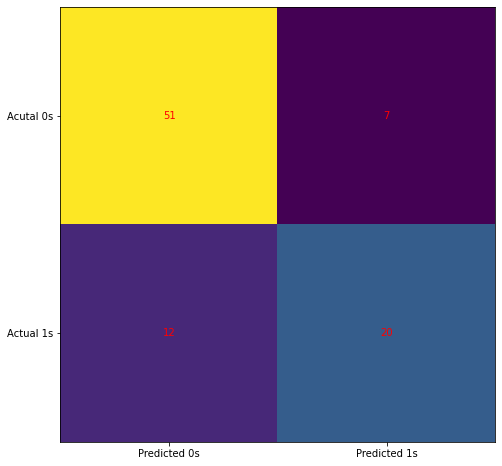

In [130]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Acutal 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='red')
plt.show()

In [212]:
##test set accuracy
model.score(X_train,y_train)

0.8052434456928839

In [213]:
#Validation set accuracy
model.score(X_valid,y_valid)

0.7777777777777778

## Deep NN

- using sklearn MLPClassifier (multi layer perceptron network), class of feedforward neural network

In [97]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=500).fit(X_train,y_train)
clf.score(X_train,y_train)

0.686641697877653

In [98]:
clf.score(X_valid, y_valid)

0.8

## Fast ai

In [292]:
!conda install fastbook
import fastbook
fastbook.setup_book()

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - fastbook

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [293]:
from fastbook import *


In [294]:
survivors = DataBlock(
    blocks=(MultiCategoryBlock, CategoryBlock),
    get_x=X_train,
    get_y=y_train)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()